In [259]:
import selenium
from selenium import webdriver
from urllib.parse import quote
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
%matplotlib inline
import platform
from scipy.stats import *
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': 
    # 윈도우   
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [150]:
data = pd.read_csv('./final/조기.csv')

In [151]:
data.head()

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,일시
0,(선)백조기,기타,NaN,NaN,2,1.0,"20,000","20,000","20,000",2000.01.03
1,(선)백조기,제주,NaN,NaN,6,1.0,"10,000","10,000","10,000",2000.01.03
2,(선)수조기,목포,NaN,NaN,1,1.0,"40,000","40,000","40,000",2000.01.03
3,(선)조기,인천,NaN,NaN,8,1.0,"45,000","35,000","40,000",2000.01.03
4,(선)조기,기타,NaN,NaN,2,1.0,"400,000","400,000","400,000",2000.01.03


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71483 entries, 0 to 71482
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   어종      71483 non-null  object 
 1   산지      71481 non-null  object 
 2   규격      61774 non-null  object 
 3   포장      61774 non-null  object 
 4   수량      71483 non-null  object 
 5   중량      71483 non-null  float64
 6   낙찰고가    71483 non-null  object 
 7   낙찰저가    71483 non-null  object 
 8   평균가     71483 non-null  object 
 9   일시      71483 non-null  object 
dtypes: float64(1), object(9)
memory usage: 5.5+ MB


In [153]:
data =data.drop(['규격','포장'], axis=1)

In [154]:
data['수량'] = data['수량'].str.replace(',','')

In [155]:
data['수량'] = data['수량'].astype({'수량':float})

In [156]:
data['평균가'] = data['평균가'].str.replace(',','')
data['평균가'] = data['평균가'].astype(float)

In [157]:
data['qty'] = data['수량']*data['중량']

In [158]:
data_f = data.drop(['수량', '중량','낙찰고가','낙찰저가'], axis=1)

In [160]:
data_f

,어종,산지,평균가,일시,qty
0,(선)백조기,기타,20000.0,2000.01.03,2.0
1,(선)백조기,제주,10000.0,2000.01.03,6.0
2,(선)수조기,목포,40000.0,2000.01.03,1.0
3,(선)조기,인천,40000.0,2000.01.03,8.0
4,(선)조기,기타,400000.0,2000.01.03,2.0
...,...,...,...,...,...
71478,(선)백조기,부산(기장),80000.0,2021.04.01,40.0
71479,(선)수조기,제주도,65000.0,2021.04.01,40.0
71480,(선)참조기,제주도,294000.0,2021.04.01,4.2
71481,(선)참조기,제주도,476000.0,2021.04.01,6.8


In [161]:
data_f.columns = ['species','from','평균가','date','qty']

In [162]:
data_f['1kg price'] = (data_f['평균가']/data['중량']).round(2)

In [165]:
data_f = data_f.drop(['평균가'],axis=1)
data_f

,species,from,date,qty,1kg price
0,(선)백조기,기타,2000.01.03,2.0,20000.0
1,(선)백조기,제주,2000.01.03,6.0,10000.0
2,(선)수조기,목포,2000.01.03,1.0,40000.0
3,(선)조기,인천,2000.01.03,8.0,40000.0
4,(선)조기,기타,2000.01.03,2.0,400000.0
...,...,...,...,...,...
71478,(선)백조기,부산(기장),2021.04.01,40.0,4000.0
71479,(선)수조기,제주도,2021.04.01,40.0,3250.0
71480,(선)참조기,제주도,2021.04.01,4.2,70000.0
71481,(선)참조기,제주도,2021.04.01,6.8,70000.0


In [166]:
data_f.groupby(['species']).sum().sort_values('qty',ascending=False).round(1).head(10)

,qty,1kg price
species,,
(선)참조기,5686758.9,331811698.0
(냉)조기,4299638.2,42163253.7
(냉)조기 기타,3299146.9,18357779.8
(선)백조기,2076841.1,107031817.7
(냉)참조기,1319863.7,52331873.6
(선)조기,591871.3,151492760.2
(선)수조기,121327.1,46036896.7
(냉)수조기,105797.0,679726.9
(냉)백조기,74575.5,611864.0


In [167]:
grouped = data_f.groupby('species')
species = grouped.agg({'qty': 'sum', '1kg price' : 'mean'}).round(2)

In [168]:
species.sort_values('qty',ascending=False)

,qty,1kg price
species,,
(선)참조기,5686758.9,18406.37
(냉)조기,4299638.2,5208.56
(냉)조기 기타,3299146.9,4510.51
(선)백조기,2076841.1,3695.98
(냉)참조기,1319863.7,14082.85
(선)조기,591871.3,36495.49
(선)수조기,121327.1,11729.15
(냉)수조기,105797.0,3146.88
(냉)백조기,74575.5,3059.32


In [169]:
index_g = data_f[(data_f['species']=='(선)조기 기타') | (data_f['species']=='(냉건)백조기')
                 |(data_f['species']=='(활)참조기')|(data_f['species']=='(활)수조기')].index

In [171]:
index_g2 = data_f[(data_f['species']=='(냉)백조기') | (data_f['species']=='(냉)수조기')].index

In [174]:
index_g3 = data_f[(data_f['species']=='(선)수조기') | (data_f['species']=='(선)조기')].index

In [175]:
len(index_g3)

8076

In [176]:
data_f = data_f.drop(index_g3,axis=0)

In [177]:
data_f.shape

(62867, 5)

In [178]:
grouped = data_f.groupby('species')
species = grouped.agg({'qty': 'sum', '1kg price' : 'mean'}).round(2)
species.sort_values('qty',ascending=False)

,qty,1kg price
species,,
(선)참조기,5686758.9,18406.37
(냉)조기,4299638.2,5208.56
(냉)조기 기타,3299146.9,4510.51
(선)백조기,2076841.1,3695.98
(냉)참조기,1319863.7,14082.85


In [266]:
grouped = data_ff.groupby('from')
origin = grouped.agg({'qty': 'sum', '1kg price' : 'mean'}).round(2)

In [202]:
pd.set_option('display.max_row', 500)

In [282]:
origin.sort_values('qty',ascending=False).tail(33)

,qty,1kg price
from,,
미국,1289.0,25875.00
기타(수입),1000.0,4630.00
벌교,865.0,944.44
세네갈,800.0,5000.00
서산,759.5,7061.33
포항,729.0,22010.30
속초,453.0,8882.78
(원양)라스팔마스,450.0,3333.33
베트남,434.0,19920.64


In [274]:
index_g = data_f[(data_f['from']=='소래') | (data_f['from']=='고성')
                 |(data_f['from']=='포클랜드')|(data_f['from']=='안면도')].index
data_ff = data_f.drop(index_g,axis=0)
data_f.shape, data_ff.shape 

((62867, 5), (62862, 5))

In [287]:
a = origin[origin['qty']<200000].index
test1 = pd.DataFrame()
for i in a.values :
    test = data_ff[data_ff['from'] == i]
    test1 = test1.append(test)

In [288]:
a

Index(['(원양)라스팔마스', '(원양)러시아', '(원양)인도네시아', 'CONGO. THE DEMOCRATIC REPUBLIC',
       '감포', '거문도', '거제도', '거진', '격포', '고흥', '구룡포', '군산', '기타', '기타(국내)',
       '기타(수입)', '기타(원양)', '남해', '노르웨이', '대만', '대천', '동해시', '라스팔마스', '러시아',
       '마산', '멕시코', '미국', '방어진', '벌교', '베트남', '보령', '부산', '부안', '사천', '삼척',
       '서산', '서천', '세네갈', '속초', '순천', '스페인', '신안', '아르메니아', '아르헨티나', '안흥',
       '영광', '완도', '이란', '인도', '인도네시아', '인도양', '인천', '일본', '임원', '장항', '제주',
       '죽변', '진도', '축산', '충무', '콩고', '태국', '태안', '태평양', '통영', '포항', '필리핀',
       '흑산도'],
      dtype='object', name='from')

In [289]:
len(test1['from'].unique())

67

In [290]:
test1.index

Int64Index([42882, 42883, 13813, 17168, 17507, 18231, 18233, 18912, 20301,
            23648,
            ...
             8494,  8794,  9305, 24889, 35991,  4047, 28221, 28223, 37943,
            59763],
           dtype='int64', length=8611)

In [291]:
test = data_ff.drop(test1.index, axis=0)

In [292]:
test.groupby(['from']).sum().sort_values('qty',ascending=False)

,qty,1kg price
from,,
중국,7455049.40,1.130880e+08
제주도,4184254.82,2.409812e+08
목포,1504515.30,3.137328e+07
나로도,537988.50,1.441642e+07
부산(기장),481051.30,8.109723e+06
삼천포,426504.30,1.434819e+07
(원양)중국,395778.50,1.504205e+06
여수,391855.88,1.073798e+07
추자도,300671.40,2.813745e+06


In [293]:
len(data_ff), len(test)

(62862, 54251)

In [296]:
grouped2 = test.groupby('from')
origin2 = grouped2.agg({'qty': 'sum', '1kg price' : 'mean'}).round(2)
origin2.sort_values('qty', ascending=False)

,qty,1kg price
from,,
중국,7455049.40,8932.70
제주도,4184254.82,13812.19
목포,1504515.30,6758.57
나로도,537988.50,1708.71
부산(기장),481051.30,3775.48
삼천포,426504.30,3180.01
(원양)중국,395778.50,3380.24
여수,391855.88,3437.25
추자도,300671.40,3369.75


In [303]:
test = test.drop(9283,axis=0)

In [309]:
test['year'] = test['date'].str.split('.').str.get(0)
test['month'] = test['date'].str.split('.').str.get(1)
test['day'] = test['date'].str.split('.').str.get(2)

In [315]:
test[(test['from']=='(원양)중국')]

,species,from,date,qty,1kg price,year,month,day
10783,(냉)조기,(원양)중국,2006.07.31,440.0,2500.00,2006,07,31
11261,(냉)조기,(원양)중국,2006.09.26,16.0,7500.00,2006,09,26
11262,(냉)조기,(원양)중국,2006.09.26,56.0,16250.00,2006,09,26
11362,(냉)참조기,(원양)중국,2006.10.02,96.0,833.33,2006,10,02
13050,(냉)조기,(원양)중국,2007.03.17,80.0,6250.00,2007,03,17
13051,(냉)조기,(원양)중국,2007.03.17,800.0,1250.00,2007,03,17
13060,(냉)조기,(원양)중국,2007.03.19,1000.0,3000.00,2007,03,19
13070,(냉)조기,(원양)중국,2007.03.20,1152.0,2500.00,2007,03,20
13071,(냉)조기,(원양)중국,2007.03.20,80.0,14375.00,2007,03,20
13073,(냉)조기,(원양)중국,2007.03.20,800.0,2562.50,2007,03,20


In [403]:
test[(test['from']=='중국')].groupby('species').sum()

,qty,1kg price
species,,
(냉)조기,3183657.2,35437159.65
(냉)조기 기타,3237593.9,18014461.48
(냉)참조기,511391.9,32686606.72
(선)백조기,856.4,398974.99
(선)참조기,521550.0,26550800.00


In [404]:
china = test[(test['from']=='중국')]

In [405]:
test[(test['from']=='중국')].index

Int64Index([   13,    24,    34,    44,    55,    63,    70,    75,    83,
               91,
            ...
            71310, 71311, 71346, 71348, 71349, 71357, 71386, 71417, 71426,
            71447],
           dtype='int64', length=12660)

In [325]:
test

,species,from,date,qty,1kg price,year,month,day
7,(선)백조기,목포,2000.01.04,1.0,10000.0,2000,01,04
13,(냉)참조기,중국,2000.01.04,130.0,23500.0,2000,01,04
24,(냉)참조기,중국,2000.01.05,140.0,21800.0,2000,01,05
26,(선)백조기,목포,2000.01.06,30.0,17000.0,2000,01,06
34,(냉)참조기,중국,2000.01.06,225.0,27800.0,2000,01,06
...,...,...,...,...,...,...,...,...
71477,(선)참조기,제주도,2021.03.31,2.1,65000.0,2021,03,31
71478,(선)백조기,부산(기장),2021.04.01,40.0,4000.0,2021,04,01
71480,(선)참조기,제주도,2021.04.01,4.2,70000.0,2021,04,01
71481,(선)참조기,제주도,2021.04.01,6.8,70000.0,2021,04,01


In [406]:
a = test[test['from']=='중국'].index

In [407]:
a

Int64Index([   13,    24,    34,    44,    55,    63,    70,    75,    83,
               91,
            ...
            71310, 71311, 71346, 71348, 71349, 71357, 71386, 71417, 71426,
            71447],
           dtype='int64', length=12660)

In [408]:
china_exc = test.drop(a,axis=0)

In [409]:
china_exc.groupby('from').sum()

,qty,1kg price
from,,
(원양)중국,395778.50,1.504205e+06
나로도,537988.50,1.441642e+07
목포,1504515.30,3.137328e+07
부산(기장),481051.30,8.109723e+06
삼천포,426504.30,1.434819e+07
여수,391855.88,1.073798e+07
제주도,4184254.82,2.409812e+08
추자도,300671.40,2.813745e+06


In [410]:
china

,species,from,date,qty,1kg price,year,month,day
13,(냉)참조기,중국,2000.01.04,130.0,23500.00,2000,01,04
24,(냉)참조기,중국,2000.01.05,140.0,21800.00,2000,01,05
34,(냉)참조기,중국,2000.01.06,225.0,27800.00,2000,01,06
44,(냉)참조기,중국,2000.01.07,220.0,28400.00,2000,01,07
55,(냉)참조기,중국,2000.01.08,444.0,29100.00,2000,01,08
...,...,...,...,...,...,...,...,...
71357,(냉)조기,중국,2021.03.12,80.0,7150.00,2021,03,12
71386,(냉)조기,중국,2021.03.16,180.0,2972.22,2021,03,16
71417,(냉)조기,중국,2021.03.19,80.0,5675.00,2021,03,19
71426,(냉)조기,중국,2021.03.20,400.0,4775.00,2021,03,20


In [411]:
grouped = china.groupby('species')
origin = grouped.agg({'qty': 'sum', '1kg price' : 'mean'}).round(2)
origin

,qty,1kg price
species,,
(냉)조기,3183657.2,5422.67
(냉)조기 기타,3237593.9,4601.40
(냉)참조기,511391.9,25576.37
(선)백조기,856.4,11734.56
(선)참조기,521550.0,29566.59


In [412]:
china = china.drop(china[china['species']=='(선)백조기'].index,axis=0)

In [425]:
china[china['1kg price']>100000].index

Int64Index([990, 3031], dtype='int64')

In [426]:
china = china.drop(china[china['1kg price']>100000].index,axis=0)

In [427]:
t = [china[china['species']=='(냉)조기']['1kg price'],china[china['species']=='(냉)조기 기타']['1kg price'],china[china['species']=='(냉)참조기']['1kg price'],china[china['species']=='(선)참조기']['1kg price']]

{'whiskers': [<matplotlib.lines.Line2D at 0x20f1db2bbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x20f1dbd16d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20f1db2ba00>,
 'medians': [<matplotlib.lines.Line2D at 0x20f1dbd1400>,
 'fliers': [<matplotlib.lines.Line2D at 0x20f1dbd1d00>,
 'means': []}

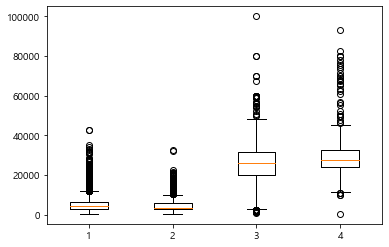

In [428]:
plt.boxplot(t)

In [ ]:
# 참조기 / 조기 나눠서 다시 이상치 처리

In [354]:
pd.qcut(china['1kg price'], 4, ['q1','q2','q3','q4'])

13       q4
24       q4
34       q4
44       q4
55       q4
         ..
71357    q3
71386    q2
71417    q3
71426    q3
71447    q3
Name: 1kg price, Length: 12626, dtype: category
Categories (4, object): ['q1' < 'q2' < 'q3' < 'q4']

In [355]:
Q1 = (china['1kg price']).quantile(.25)
Q2 = (china['1kg price']).quantile(.5)
Q3 = (china['1kg price']).quantile(.75)
Q1,Q2,Q3
IQR = Q3-Q1
IQR

6596.84

In [356]:
min = Q1-1.5*IQR
max = (Q3+1.5*IQR).round(2)
min, max

(-6978.59, 19408.77)

In [359]:
china = china[china['1kg price']<=max]

In [360]:
china

,species,from,date,qty,1kg price,year,month,day
292,(냉)참조기,중국,2000.02.11,10160.0,14100.00,2000,02,11
712,(선)참조기,중국,2000.04.08,100.0,10000.00,2000,04,08
777,(선)참조기,중국,2000.04.18,210.0,16200.00,2000,04,18
787,(냉)참조기,중국,2000.04.19,100.0,15000.00,2000,04,19
826,(선)참조기,중국,2000.04.25,150.0,13300.00,2000,04,25
...,...,...,...,...,...,...,...,...
71357,(냉)조기,중국,2021.03.12,80.0,7150.00,2021,03,12
71386,(냉)조기,중국,2021.03.16,180.0,2972.22,2021,03,16
71417,(냉)조기,중국,2021.03.19,80.0,5675.00,2021,03,19
71426,(냉)조기,중국,2021.03.20,400.0,4775.00,2021,03,20


In [365]:
origin

,qty,1kg price
species,,
(냉)조기,3174057.3,5089.06
(냉)조기 기타,3233507.4,4514.25
(냉)참조기,72828.9,10202.62
(선)참조기,31974.0,16347.46


In [367]:
china = china.drop(china[china['species']=='(선)참조기'].index,axis=0)

In [369]:
len(china[china['species']=='(냉)참조기'])

270

In [371]:
china = china.drop(china[china['species']=='(냉)참조기'].index,axis=0)
china

,species,from,date,qty,1kg price,year,month,day
9719,(냉)조기,중국,2006.03.22,320.0,2500.00,2006,03,22
9734,(냉)조기,중국,2006.03.28,800.0,1125.00,2006,03,28
9739,(냉)조기,중국,2006.03.30,80.0,8750.00,2006,03,30
9740,(냉)조기,중국,2006.03.30,1360.0,3375.00,2006,03,30
9741,(냉)조기,중국,2006.03.30,800.0,2250.00,2006,03,30
...,...,...,...,...,...,...,...,...
71357,(냉)조기,중국,2021.03.12,80.0,7150.00,2021,03,12
71386,(냉)조기,중국,2021.03.16,180.0,2972.22,2021,03,16
71417,(냉)조기,중국,2021.03.19,80.0,5675.00,2021,03,19
71426,(냉)조기,중국,2021.03.20,400.0,4775.00,2021,03,20


In [ ]:
# 국내 조기

In [380]:
china_exc

,species,from,date,qty,1kg price,year,month,day
7,(선)백조기,목포,2000.01.04,1.0,10000.0,2000,01,04
26,(선)백조기,목포,2000.01.06,30.0,17000.0,2000,01,06
35,(선)백조기,목포,2000.01.07,4.0,7500.0,2000,01,07
54,(선)참조기,목포,2000.01.08,1.0,150000.0,2000,01,08
56,(선)백조기,목포,2000.01.10,2.0,15000.0,2000,01,10
...,...,...,...,...,...,...,...,...
71477,(선)참조기,제주도,2021.03.31,2.1,65000.0,2021,03,31
71478,(선)백조기,부산(기장),2021.04.01,40.0,4000.0,2021,04,01
71480,(선)참조기,제주도,2021.04.01,4.2,70000.0,2021,04,01
71481,(선)참조기,제주도,2021.04.01,6.8,70000.0,2021,04,01


In [397]:
grouped = china_exc.groupby('species')
origin = grouped.agg({'qty': 'sum', '1kg price' : 'mean'}).round(2)
origin

,qty,1kg price
species,,
(냉)조기,806038.5,3405.37
(냉)참조기,572202.5,5005.90
(선)백조기,1712176.9,2406.07
(선)참조기,4760397.5,4493.58


<AxesSubplot:>

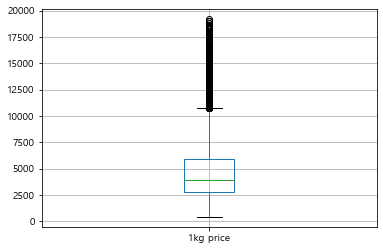

In [376]:
china[['1kg price']].boxplot()

In [377]:
pd.qcut(china['1kg price'], 4, ['q1','q2','q3','q4'])
Q1 = (china['1kg price']).quantile(.25)
Q2 = (china['1kg price']).quantile(.5)
Q3 = (china['1kg price']).quantile(.75)
Q1,Q2,Q3
IQR = Q3-Q1
IQR

3211.54

In [378]:
min = Q1-1.5*IQR
max = (Q3+1.5*IQR).round(2)
min, max

(-2067.3099999999995, 10778.85)

In [394]:
china_exc=china_exc[china_exc['1kg price']<=max]

In [395]:
china_exc

,species,from,date,qty,1kg price,year,month,day
7,(선)백조기,목포,2000.01.04,1.0,10000.0,2000,01,04
35,(선)백조기,목포,2000.01.07,4.0,7500.0,2000,01,07
77,(선)백조기,목포,2000.01.13,3.0,10000.0,2000,01,13
85,(선)백조기,목포,2000.01.14,3.0,5000.0,2000,01,14
165,(선)백조기,목포,2000.01.25,103.0,10500.0,2000,01,25
...,...,...,...,...,...,...,...,...
71467,(선)백조기,제주도,2021.03.30,56.0,7125.0,2021,03,30
71469,(선)참조기,제주도,2021.03.30,80.0,7815.0,2021,03,30
71470,(선)백조기,제주도,2021.03.31,80.0,5312.5,2021,03,31
71471,(선)백조기,제주도,2021.03.31,40.0,1500.0,2021,03,31


In [398]:
origin

,qty,1kg price
species,,
(냉)조기,806038.5,3405.37
(냉)참조기,572202.5,5005.90
(선)백조기,1712176.9,2406.07
(선)참조기,4760397.5,4493.58


In [399]:
len(china_exc[china_exc['species']=='(냉)조기']), len(china_exc[china_exc['species']=='(냉)참조기']) , len(china_exc[china_exc['species']=='(선)백조기']) , len(china_exc[china_exc['species']=='(선)참조기'])

(1103, 1475, 21888, 10975)

In [396]:
china_exc = china_exc.drop(china_exc[china_exc['species']=='(냉)조기 기타'].index,axis=0)
china_exc

,species,from,date,qty,1kg price,year,month,day
7,(선)백조기,목포,2000.01.04,1.0,10000.0,2000,01,04
35,(선)백조기,목포,2000.01.07,4.0,7500.0,2000,01,07
77,(선)백조기,목포,2000.01.13,3.0,10000.0,2000,01,13
85,(선)백조기,목포,2000.01.14,3.0,5000.0,2000,01,14
165,(선)백조기,목포,2000.01.25,103.0,10500.0,2000,01,25
...,...,...,...,...,...,...,...,...
71467,(선)백조기,제주도,2021.03.30,56.0,7125.0,2021,03,30
71469,(선)참조기,제주도,2021.03.30,80.0,7815.0,2021,03,30
71470,(선)백조기,제주도,2021.03.31,80.0,5312.5,2021,03,31
71471,(선)백조기,제주도,2021.03.31,40.0,1500.0,2021,03,31


<BarContainer object of 4 artists>

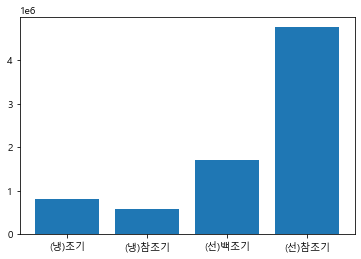

In [401]:
plt.bar(origin.index,origin['qty'])